# Logistic Regression Project Exercise

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


----

**TASK: Run the cell below to read in the data.**

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [ ]:
# CODE HERE

In [4]:
X = df.drop('target',axis=1)
y = df['target']

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [ ]:
# CODE HERE

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [ ]:
# CODE HERE

## Logistic Regression Model

**TASK: Create a Logistic Regression model

In [ ]:
# CODE HERE

In [7]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Coeffecients

**TASK: Report back the model's coefficients.**

In [8]:
# prompt: TASK: Report back the model's coefficients

log_model.coef_

array([[-0.1460119 , -0.736331  ,  0.87254896, -0.34210587, -0.22221822,
         0.2183265 ,  0.20681801,  0.37897876, -0.47888118, -0.52546222,
         0.46029361, -0.77312766, -0.49532266]])

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

[[27 10]
 [ 4 35]]


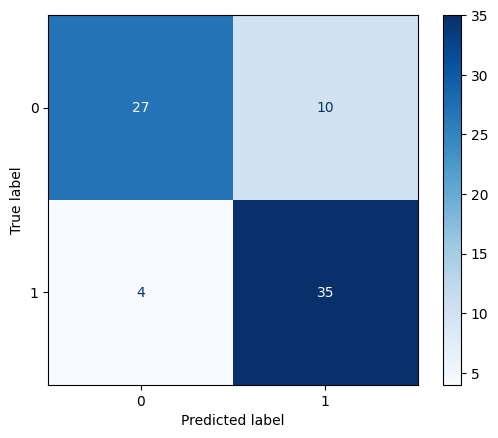

              precision    recall  f1-score   support

           0       0.87      0.73      0.79        37
           1       0.78      0.90      0.83        39

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



In [15]:
# prompt: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics'
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix
# predictions = log_model.predict(scaled_X_test)
# print(confusion_matrix(y_test,predictions))
# plot_confusion_matrix(log_model,scaled_X_test,y_test)
# plt.show()
# print(classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = log_model.predict(scaled_X_test)

print(confusion_matrix(y_test, predictions))

# Use ConfusionMatrixDisplay from sklearn 1.0 onwards
# For earlier versions, you might need to use display or other methods.
# If you are on an older version and the following line causes an error,
# you might need to install a newer version of scikit-learn or
# use a different method to plot the confusion matrix.
# Example for older versions might involve using matplotlib.pyplot.matshow
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, cmap=plt.cm.Blues)

plt.show()

print(classification_report(y_test, predictions))


In [ ]:
# CODE HERE

In [ ]:
# CODE HERE

### Performance Curves

**TASK: Create the ROC Curve.**

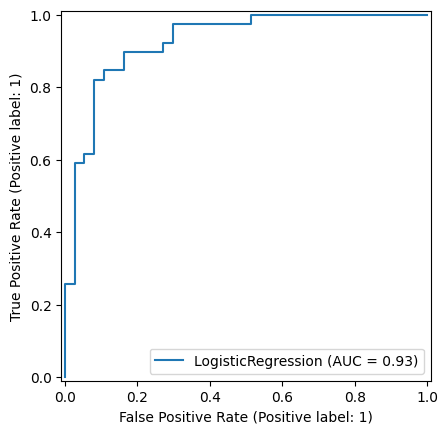

In [17]:
# prompt: from sklearn.metrics import plot_roc_curve
# plot_roc_curve(log_model,scaled_X_test,y_test)
# cannot import name 'plot_roc_curve' from 'sklearn.metrics'

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.show()

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [18]:
# prompt: TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?
# age          48.0
# sex           0.0
# cp            2.0
# trestbps    130.0
# chol        275.0
# fbs           0.0
# restecg       1.0
# thalach     139.0
# exang         0.0
# oldpeak       0.2
# slope         2.0
# ca            0.0
# thal          2.0

import numpy as np
# Patient features provided:
# age          48.0
# sex           0.0
# cp            2.0
# trestbps    130.0
# chol        275.0
# fbs           0.0
# restecg       1.0
# thalach     139.0
# exang         0.0
# oldpeak       0.2
# slope         2.0
# ca            0.0
# thal          2.0

# Create a numpy array for the patient features
patient_features = np.array([[48.0, 0.0, 2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0]])

# Scale the patient features using the same scaler fitted on the training data
scaled_patient_features = scaler.transform(patient_features)

# Predict the probability of the patient having heart disease
prediction_proba = log_model.predict_proba(scaled_patient_features)

# Predict the class (0 for no disease, 1 for disease)
prediction = log_model.predict(scaled_patient_features)

print(f"Model Prediction (0: No Disease, 1: Disease): {prediction[0]}")
print(f"Probability of No Disease: {prediction_proba[0][0]:.4f}")
print(f"Probability of Disease: {prediction_proba[0][1]:.4f}")

if prediction[0] == 1:
    print("Based on the model, this patient is predicted to have heart disease.")
    print(f"The model is {prediction_proba[0][1]:.2%} sure of this prediction.")
else:
    print("Based on the model, this patient is predicted to not have heart disease.")
    print(f"The model is {prediction_proba[0][0]:.2%} sure of this prediction.")

Model Prediction (0: No Disease, 1: Disease): 1
Probability of No Disease: 0.0173
Probability of Disease: 0.9827
Based on the model, this patient is predicted to have heart disease.
The model is 98.27% sure of this prediction.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# EXPECTED PREDICTION

----

## Great Job!